# **CNN Architecture for object detection in image with various regularization techniques**

In [ ]:
# Import numerical computing library (for arrays, math operations, etc.)
import numpy as np

# Import seaborn for easier and prettier visualizations
import seaborn as sns

# Import matplotlib for plotting graphs and charts
import matplotlib.pyplot as plt

# Import TensorFlow (deep learning framework)
import tensorflow as tf

# From TensorFlow, import Keras (high-level API for building neural networks)
from tensorflow import keras

# Import classes for building a sequential model (layer by layer)
from tensorflow.keras.models import Sequential

# Import commonly used layers for CNNs:
from tensorflow.keras.layers import (
    Conv2D,         # Convolution layer (extracts features from images)
    MaxPooling2D,   # Max pooling layer (downsamples the features)
    Flatten,        # Flattens 2D feature maps into 1D vector
    Dense,          # Fully connected (dense) layer
    Dropout         # Dropout layer (reduces overfitting)
)

# Import L2 regularization (helps prevent overfitting by adding penalty)
from tensorflow.keras.regularizers import l2

# Import utility for one-hot encoding labels (used for classification tasks)
from tensorflow.keras.utils import to_categorical

# Import function to split dataset into training and testing parts
from sklearn.model_selection import train_test_split

# Import functions to evaluate the model: confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Loading the Fashion MNIST dataset from Keras datasets
# It automatically splits the data into training and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Preprocessing steps:

# 1. Normalize the pixel values to the range [0, 1]
# (original pixel values are in [0, 255])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. Expand dimensions to add a channel dimension (for grayscale images)
# CNNs expect 4D input: (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, -1)  # shape becomes (batch_size, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# 3. Convert the labels into one-hot encoded vectors
# (10 classes for the 10 different types of clothing)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
# Train-validation split
x_train_sub, x_val_sub, y_train_sub, y_val_sub = train_test_split(
    x_train, y_train_cat, test_size=0.2, random_state=42
)

**Building CNN model with different regularizations**

**Model 1: With L2 Regularization**

In [ ]:
# Function to build a CNN model with L2 regularization
def build_model_l2():
    model = Sequential([

        # 1st Convolution layer:
        # - 32 filters
        # - 3x3 kernel size
        # - ReLU activation
        # - L2 regularization to reduce overfitting
        Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(28,28,1)),

        # 1st MaxPooling layer:
        # - 2x2 pool size (reduces the spatial dimensions)
        MaxPooling2D((2,2)),

        # 2nd Convolution layer:
        # - 64 filters
        # - 3x3 kernel
        # - ReLU activation
        # - L2 regularization again
        Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),

        # 2nd MaxPooling layer:
        MaxPooling2D((2,2)),

        # Flatten the feature maps into a 1D vector for the dense layers
        Flatten(),

        # Dense (fully connected) layer with 64 neurons + ReLU activation + L2 regularization
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),

        # Output layer:
        # - 10 neurons (one for each clothing class)
        # - Softmax activation to get probabilities
        Dense(10, activation='softmax')
    ])

    # Compile the model:
    # - Adam optimizer (efficient gradient descent)
    # - Categorical crossentropy (for multi-class classification)
    # - Track accuracy as a metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model  # Return the built model

**Model 2: With Dropout Regularization**

In [ ]:
# Function to build a CNN model with Dropout layers (for regularization)
def build_model_dropout():
    model = Sequential([
        
        # 1st Convolution layer:
        # - 32 filters
        # - 3x3 kernel
        # - ReLU activation
        # - Input shape specified for 28x28 grayscale images
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

        # 1st MaxPooling layer to downsample feature maps
        MaxPooling2D((2,2)),

        # Dropout layer to randomly set 30% of neurons to zero (helps prevent overfitting)
        Dropout(0.3),

        # 2nd Convolution layer:
        # - 64 filters
        # - 3x3 kernel
        # - ReLU activation
        Conv2D(64, (3,3), activation='relu'),

        # 2nd MaxPooling layer
        MaxPooling2D((2,2)),

        # Another Dropout layer with 30% dropout rate
        Dropout(0.3),

        # Flatten the feature maps into a 1D array for the dense layers
        Flatten(),

        # Dense (fully connected) layer with 64 neurons + ReLU activation
        Dense(64, activation='relu'),

        # Dropout layer with 50% dropout rate (higher dropout before output to strongly regularize)
        Dropout(0.5),

        # Output layer:
        # - 10 neurons for 10 classes
        # - Softmax activation for probability distribution
        Dense(10, activation='softmax')
    ])

    # Compile the model:
    # - Using Adam optimizer
    # - Categorical crossentropy loss for multi-class classification
    # - Track accuracy as a metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model  # Return the built model

In [21]:
model_l2 = build_model_l2()
model_dropout = build_model_dropout()

**model training**

In [22]:
# Train L2 model
history_l2 = model_l2.fit(
    x_train_sub, y_train_sub,
    epochs=15,
    batch_size=64,
    validation_data=(x_val_sub, y_val_sub),
    verbose=1
)

# Train Dropout model
history_dropout = model_dropout.fit(
    x_train_sub, y_train_sub,
    epochs=15,
    batch_size=64,
    validation_data=(x_val_sub, y_val_sub),
    verbose=1
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7186 - loss: 0.8978 - val_accuracy: 0.8528 - val_loss: 0.5204
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - accuracy: 0.8578 - loss: 0.5017 - val_accuracy: 0.8576 - val_loss: 0.4814
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8686 - loss: 0.4570 - val_accuracy: 0.8723 - val_loss: 0.4385
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.8796 - loss: 0.4229 - val_accuracy: 0.8792 - val_loss: 0.4172
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.8836 - loss: 0.4041 - val_accuracy: 0.8820 - val_loss: 0.4047
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8889 - loss: 0.3916 - val_accuracy: 0.8831 - val_loss: 0.4043
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8919 - loss: 0.3835 - val_accuracy: 0.8901 - val_loss: 0.3943
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8945 - loss: 0.3734 - 

**Evaluation of both models**

In [23]:
test_loss_l2, test_acc_l2 = model_l2.evaluate(x_test, y_test_cat, verbose=0)
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test_cat, verbose=0)

print(f"\nTest Accuracy (L2 Regularization): {test_acc_l2*100:.2f}%")
print(f"Test Loss (L2 Regularization): {test_loss_l2:.4f}")
print(f"\nTest Accuracy (Dropout Regularization): {test_acc_dropout*100:.2f}%")
print(f"Test Loss (Dropout Regularization): {test_loss_dropout:.4f}")


Test Accuracy (L2 Regularization): 89.17%
Test Loss (L2 Regularization): 0.3863

Test Accuracy (Dropout Regularization): 90.25%
Test Loss (Dropout Regularization): 0.2735


**validation curves comparison**

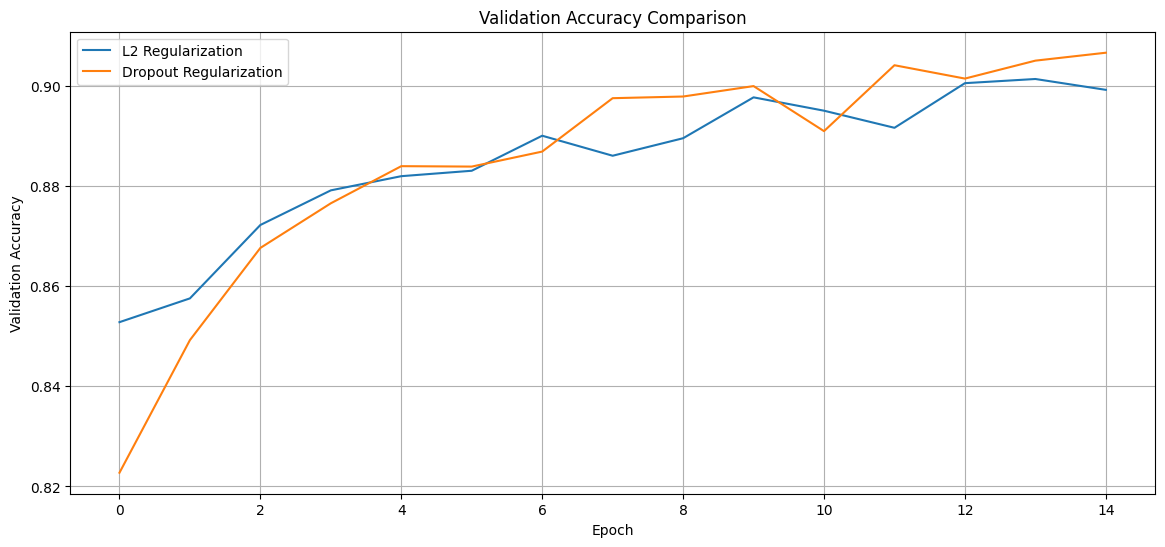

In [24]:
plt.figure(figsize=(14,6))
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Regularization')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

**validation loss comparison**

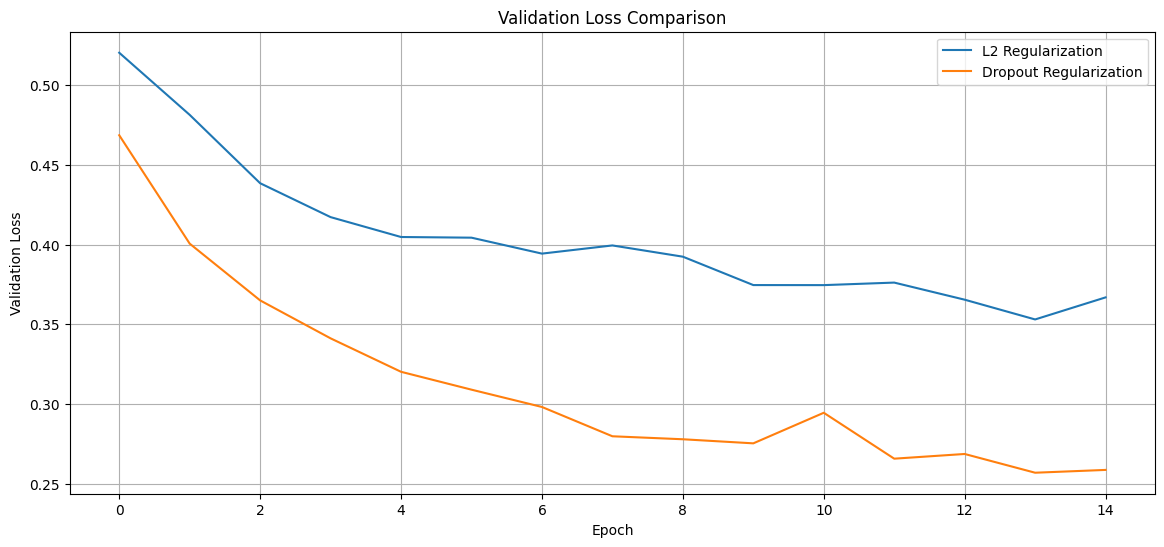

In [25]:
plt.figure(figsize=(14,6))
plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
plt.plot(history_dropout.history['val_loss'], label='Dropout Regularization')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

**Confusion matrix for both models**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


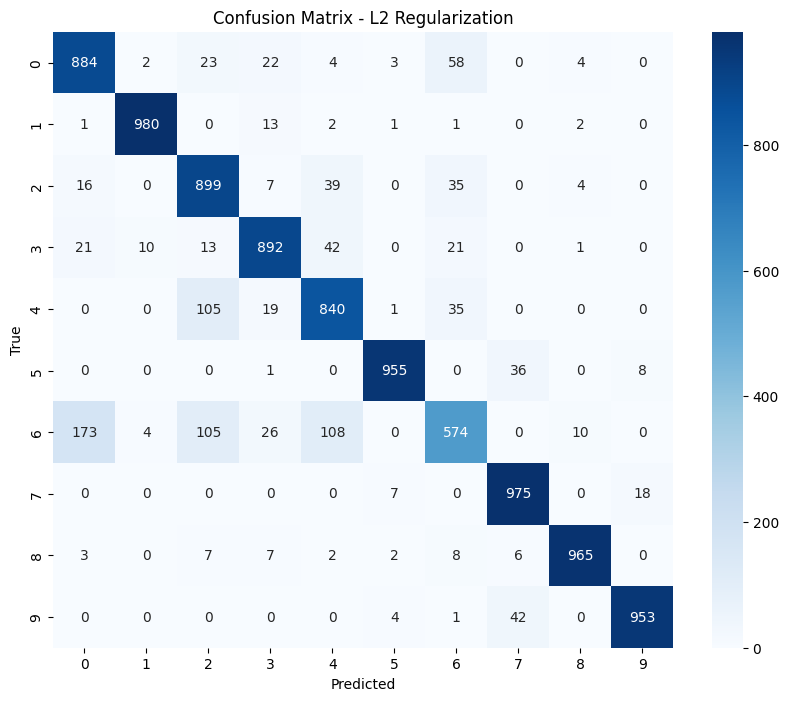

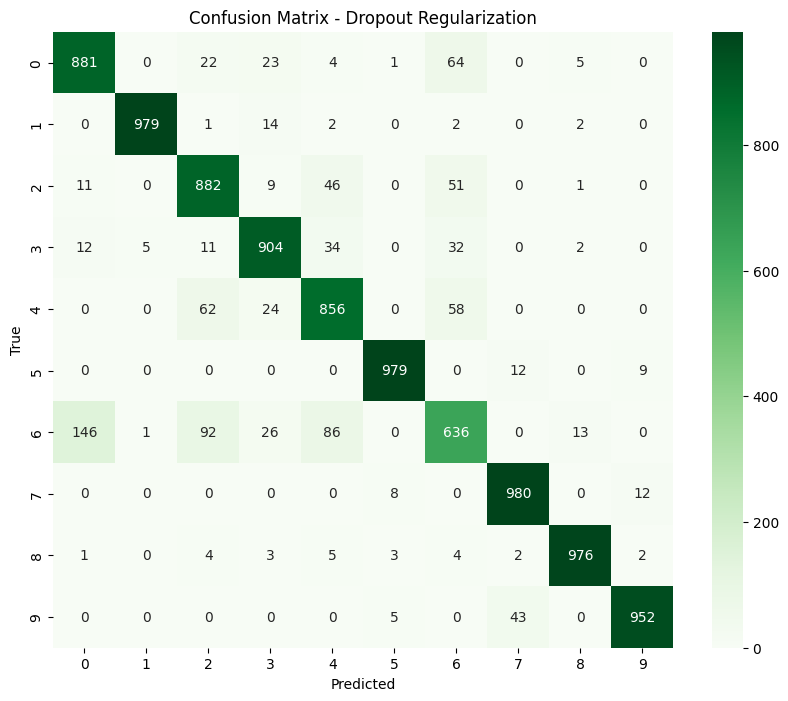

In [26]:
y_pred_l2 = np.argmax(model_l2.predict(x_test), axis=1)
y_pred_dropout = np.argmax(model_dropout.predict(x_test), axis=1)
y_true = y_test.flatten()

# Confusion Matrix for L2
cm_l2 = confusion_matrix(y_true, y_pred_l2)
plt.figure(figsize=(10,8))
sns.heatmap(cm_l2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - L2 Regularization')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Dropout
cm_dropout = confusion_matrix(y_true, y_pred_dropout)
plt.figure(figsize=(10,8))
sns.heatmap(cm_dropout, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Dropout Regularization')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Classification reports**

In [27]:
print("\nClassification Report (L2 Regularization):")
print(classification_report(y_true, y_pred_l2))

print("\nClassification Report (Dropout Regularization):")
print(classification_report(y_true, y_pred_dropout))


Classification Report (L2 Regularization):
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.78      0.90      0.84      1000
           3       0.90      0.89      0.90      1000
           4       0.81      0.84      0.82      1000
           5       0.98      0.95      0.97      1000
           6       0.78      0.57      0.66      1000
           7       0.92      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Classification Report (Dropout Regularization):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.98      